In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.constants import h, k, c

### Definir estilo

In [2]:
title_font = {"fontname": "Nimbus Sans", "size": 18,
              "color": "dimgray", "weight": "bold"}
subtitle_font = {"fontname": "Roboto", "size": 14, "color": "gray", "weight": "bold"}
text_font = {"fontname": "DejaVu Sans", "size": 12, "color": "gray", "weight": "normal"}

sns.set_style('darkgrid', {
    'font.sans-serif': ['Nimbus Sans', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.edgecolor': '0.5' 
})

sns.set_context("notebook", font_scale=1.2)

plt.rcParams['figure.dpi'] = 80

## Definir funcion

In [3]:
def radiance(T, lam):
    return 2*h*c**2/lam**5 / (np.exp(h*c/(lam*k*T))-1)

## Definir variables

In [4]:
T = np.array([100, 5800, 120000] ) # K
lam_1 = np.linspace(5e-6, 9e-5, 1000)  # m
lam_2 = np.linspace(1e-7, 3e-6, 1000)  # m
lam_3 = np.linspace(5e-9, 8e-8, 1000)  # m
lam = [lam_1, lam_2, lam_3]

## Graficar

In [5]:
colors = sns.color_palette("husl", 3)

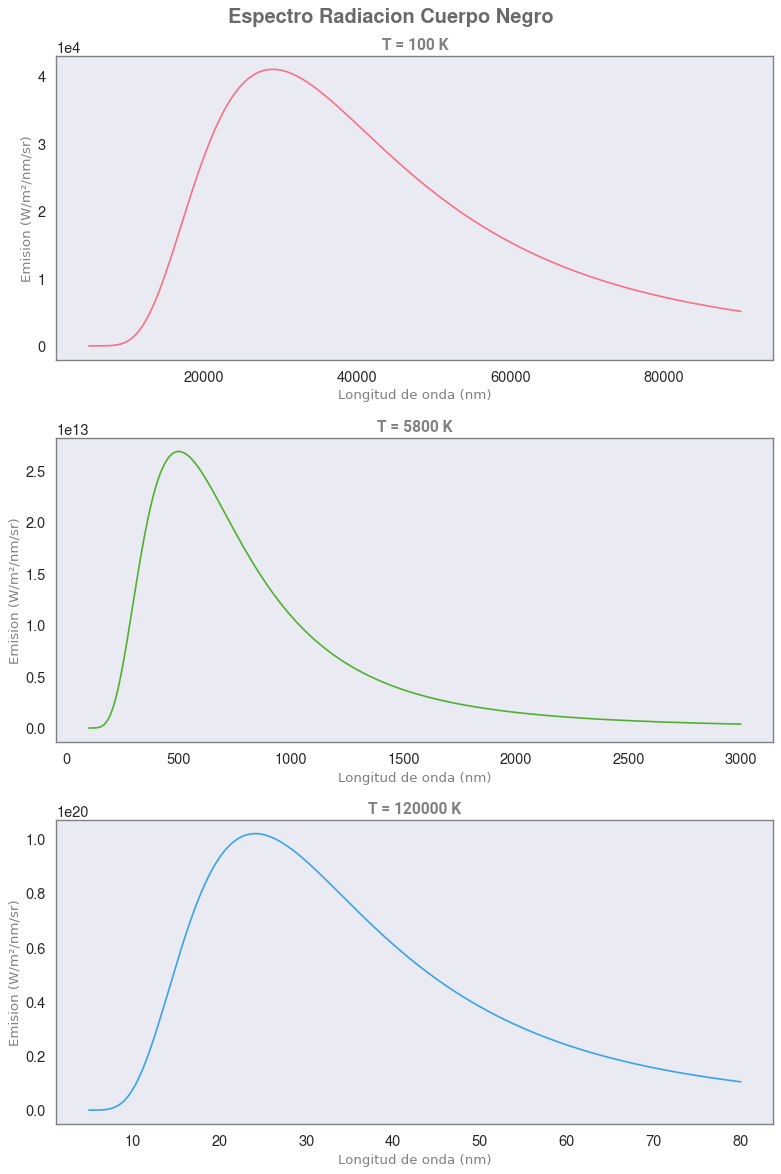

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# titulo
fig.suptitle('Espectro Radiacion Cuerpo Negro', **title_font)

# Plotear
for i, ax in enumerate(axs):
    ax.plot(lam[i]*1e9, radiance(T[i], lam[i]), color=colors[i])
    ax.set_title(f'T = {T[i]} K', **subtitle_font)
    ax.set_xlabel('Longitud de onda (nm)', **text_font)
    ax.set_ylabel('Emision (W/m²/nm/sr)', **text_font)
    ax.grid()

# Formatear ejes
for ax in axs:
    ax.yaxis.get_major_formatter().set_powerlimits((0, 1))


# Ajustar layout
plt.tight_layout()

# Guardar y mostrar
plt.savefig('blackbody_radiation.png')
plt.show()
